# Data Analysis on Adult.csv
## AI & ML Internship - Murick Technologies
**Author**: Muzamil Asghar
**Date**: September 22, 2025

This notebook performs data analysis on the UCI Adult Income dataset to predict income (>50K or ≤50K). Steps include loading, preprocessing, exploratory data analysis (EDA), and visualizations using Pandas, Seaborn, and Matplotlib.

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## 1. Load and Inspect Data
Load the Adult.csv dataset and inspect its structure.

In [12]:
# Load dataset
df = pd.read_csv('adult.csv', na_values='?')

# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [13]:
# Dataset info
print("Dataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Missing Values:
age                  0
workclass         1836
fnlwgt          

## 2. Data Preprocessing
Handle missing values, encode categorical variables, and prepare data for analysis.

In [14]:
# Handle missing values (impute with mode for categorical features)
for column in ['workclass', 'occupation', 'native.country']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Verify no missing values
print("Missing Values After Imputation:")
print(df.isnull().sum())

Missing Values After Imputation:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


C:\Users\UsEr\AppData\Local\Temp\ipykernel_30780\1660991405.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [15]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
for col in categorical_cols:
    df[col + '_encoded'] = le.fit_transform(df[col])  # Keep original for some viz

# Display encoded data
print("Encoded Data Sample:")
display(df.head())

Encoded Data Sample:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,income,workclass_encoded,education_encoded,marital.status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,native.country_encoded,income_encoded
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,...,<=50K,3,11,6,9,1,4,0,38,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,<=50K,3,11,6,3,1,4,0,38,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,...,<=50K,3,15,6,9,4,2,0,38,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,<=50K,3,5,0,6,4,4,0,38,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,<=50K,3,15,5,9,3,4,0,38,0


## 3. Exploratory Data Analysis (EDA)
Analyze distributions, correlations, and relationships.

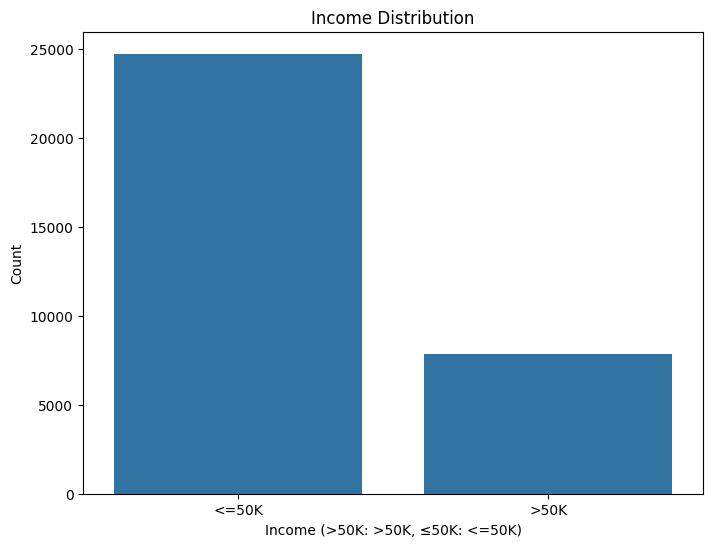

Income Distribution (%):
income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64


In [16]:
# Income distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.xlabel('Income (>50K: >50K, ≤50K: <=50K)')
plt.ylabel('Count')
plt.show()

print("Income Distribution (%):")
print(df['income'].value_counts(normalize=True) * 100)

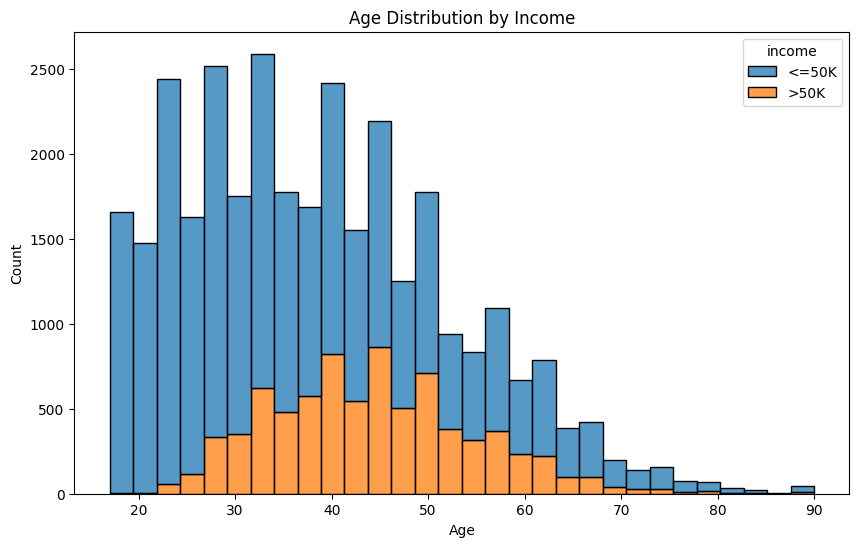

In [17]:
# Age distribution by income
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='income', multiple='stack', bins=30)
plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

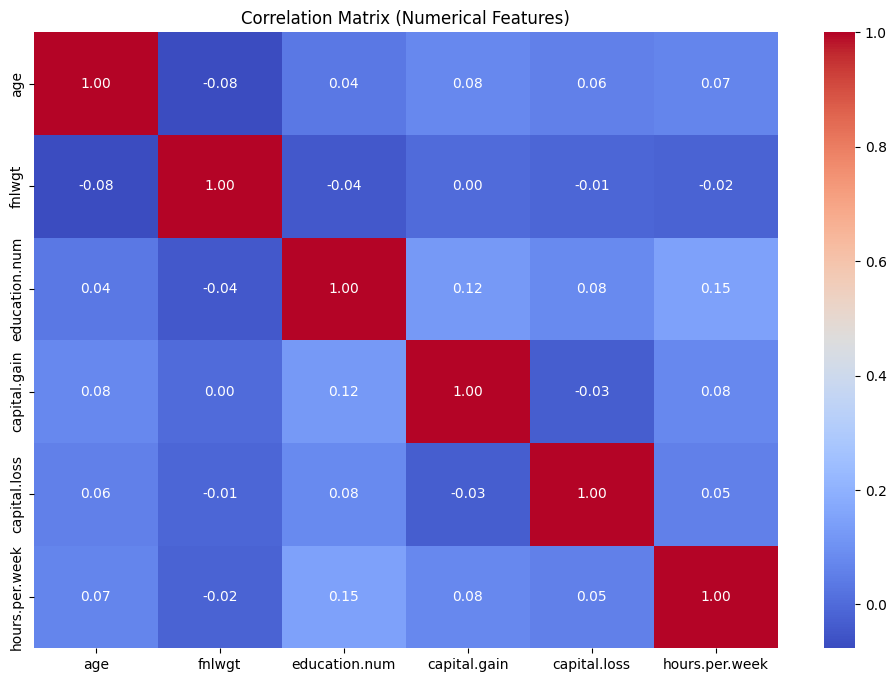

In [18]:
# Correlation matrix (only numerical columns)
numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

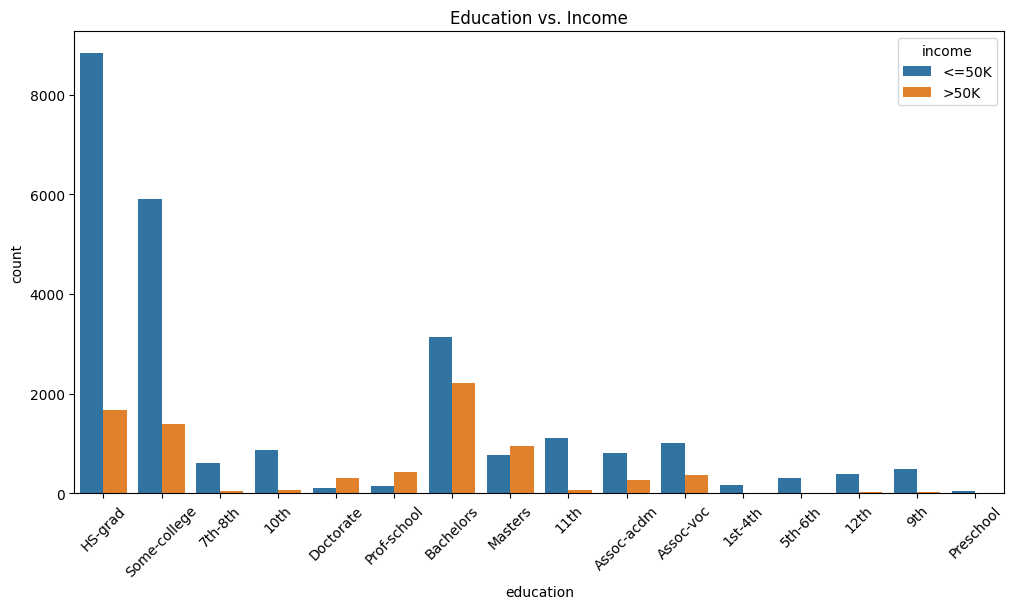

In [19]:
# Education vs. Income (using original labels)
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='income', data=df)
plt.title('Education vs. Income')
plt.xticks(rotation=45)
plt.show()

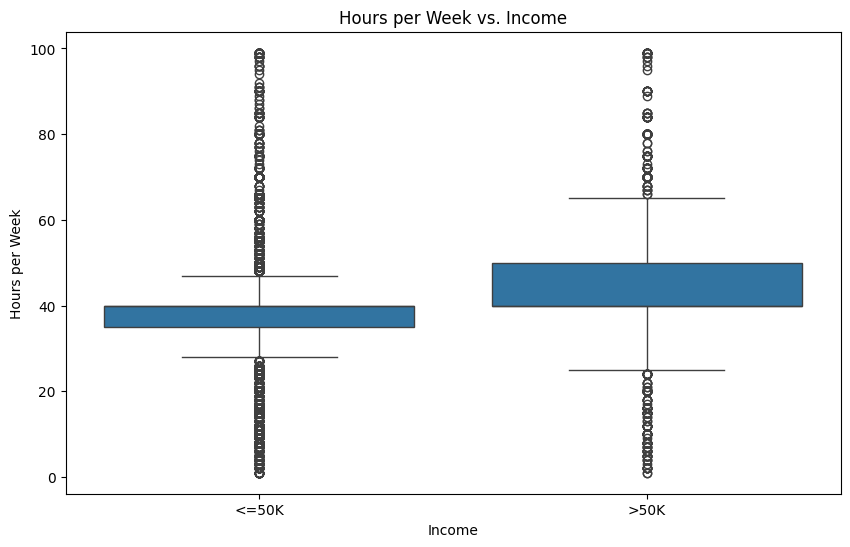

In [20]:
# Hours per week vs. Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours.per.week', data=df)
plt.title('Hours per Week vs. Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

## 4. Key Findings
- **Income Distribution**: Approximately 76% of individuals earn ≤50K, while 24% earn >50K.
- **Age**: Higher income (>50K) is more common in the 30-50 age range.
- **Education**: Higher education levels (e.g., Bachelors, Masters) strongly correlate with >50K income.
- **Occupation**: Professional and managerial roles have a higher likelihood of >50K income.
- **Hours Worked**: Individuals earning >50K tend to work more hours per week (median ~45 hours).
- **Correlations**: Education.num, capital.gain, and hours.per.week have the strongest positive correlations with income.

## 5. Conclusion
This analysis provides insights into factors influencing income, with education, occupation, and hours worked being key predictors. The processed dataset is ready for machine learning modeling in future tasks. All code and visualizations are documented for reproducibility.